#### Import packages



In [2]:
import pandas as pd
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

#### Load Dataset

In [3]:
# I moved the dataset as the same directory as this notebook, so just the file name should be fine : )
df = pd.read_csv('./Clean_Dataset.csv')

In [7]:
new = df.sample(frac=0.05, random_state=123)

#### Data Cleaning



In [4]:
len(df['flight'].unique())

1561

In [4]:
del df['Unnamed: 0'] #Gunnar: This column wasn't necessary
del df['flight']

In [5]:
df = df.sort_values(by = 'price') #Gunnar: The rows are sorted by cheapest to most expensive

In [7]:
columnsTitles=['airline', 'source_city', 'destination_city', 'departure_time', 'stops', 'arrival_time', 'class', 'duration', 'days_left',  'Distance (km)', 'price']
df = df.reindex(columns=columnsTitles)
df.head(8)                             #Gunnar: I moved destination_city next to source_city to make it easier to read

,airline,source_city,destination_city,departure_time,stops,arrival_time,class,duration,days_left,Distance (km),price
205012,Indigo,Chennai,Hyderabad,Afternoon,one,Evening,Economy,4.75,31,NaN,1105
205754,Indigo,Chennai,Hyderabad,Afternoon,one,Night,Economy,10.08,39,NaN,1105
205024,Indigo,Chennai,Hyderabad,Morning,one,Evening,Economy,8.83,31,NaN,1105
204736,AirAsia,Chennai,Hyderabad,Morning,zero,Morning,Economy,1.17,28,NaN,1105
205023,Indigo,Chennai,Hyderabad,Afternoon,one,Night,Economy,8.67,31,NaN,1105
203908,AirAsia,Chennai,Hyderabad,Morning,zero,Morning,Economy,1.17,17,NaN,1105
205022,Indigo,Chennai,Hyderabad,Afternoon,one,Night,Economy,8.42,31,NaN,1105
205021,Indigo,Chennai,Hyderabad,Morning,one,Evening,Economy,7.92,31,NaN,1105


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300153 entries, 205012 to 261377
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   destination_city  300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   Distance (km)     0 non-null       float64
 10  price             300153 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 27.5+ MB


In [9]:
#Gunnar: This is a long one. It will add a distance column~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
df.loc[df['source_city'] == 'Delhi', 'source_city'] = 1
df.loc[df['source_city'] == 'Mumbai', 'source_city'] = 2
df.loc[df['source_city'] == 'Bangalore', 'source_city'] = 3
df.loc[df['source_city'] == 'Kolkata', 'source_city'] = 4
df.loc[df['source_city'] == 'Hyderabad', 'source_city'] = 5
df.loc[df['source_city'] == 'Chennai', 'source_city'] = 6
df.loc[df['destination_city'] == 'Delhi', 'destination_city'] = 1
df.loc[df['destination_city'] == 'Mumbai', 'destination_city'] = 2
df.loc[df['destination_city'] == 'Bangalore', 'destination_city'] = 3
df.loc[df['destination_city'] == 'Kolkata', 'destination_city'] = 4
df.loc[df['destination_city'] == 'Hyderabad', 'destination_city'] = 5
df.loc[df['destination_city'] == 'Chennai', 'destination_city'] = 6
df['Distance (km)'] = np.where((df['source_city'] == 1) & (df['destination_city'] == 2), 1148, df['Distance (km)'])
df['Distance (km)'] = np.where((df['source_city'] == 2) & (df['destination_city'] == 1), 1148, df['Distance (km)'])
df['Distance (km)'] = np.where((df['source_city'] == 1) & (df['destination_city'] == 3), 1740, df['Distance (km)'])
df['Distance (km)'] = np.where((df['source_city'] == 3) & (df['destination_city'] == 1), 1740, df['Distance (km)'])
df['Distance (km)'] = np.where((df['source_city'] == 1) & (df['destination_city'] == 4), 1305, df['Distance (km)'])
df['Distance (km)'] = np.where((df['source_city'] == 4) & (df['destination_city'] == 1), 1305, df['Distance (km)'])
df['Distance (km)'] = np.where((df['source_city'] == 1) & (df['destination_city'] == 5), 1264, df['Distance (km)'])
df['Distance (km)'] = np.where((df['source_city'] == 5) & (df['destination_city'] == 1), 1264, df['Distance (km)'])
df['Distance (km)'] = np.where((df['source_city'] == 1) & (df['destination_city'] == 6), 1757, df['Distance (km)'])
df['Distance (km)'] = np.where((df['source_city'] == 6) & (df['destination_city'] == 1), 1757, df['Distance (km)'])
df['Distance (km)'] = np.where((df['source_city'] == 2) & (df['destination_city'] == 3), 842, df['Distance (km)'])
df['Distance (km)'] = np.where((df['source_city'] == 3) & (df['destination_city'] == 2), 842, df['Distance (km)'])
df['Distance (km)'] = np.where((df['source_city'] == 2) & (df['destination_city'] == 4), 1652, df['Distance (km)'])
df['Distance (km)'] = np.where((df['source_city'] == 4) & (df['destination_city'] == 2), 1652, df['Distance (km)'])
df['Distance (km)'] = np.where((df['source_city'] == 2) & (df['destination_city'] == 5), 617, df['Distance (km)'])
df['Distance (km)'] = np.where((df['source_city'] == 5) & (df['destination_city'] == 2), 617, df['Distance (km)'])
df['Distance (km)'] = np.where((df['source_city'] == 2) & (df['destination_city'] == 6), 1028, df['Distance (km)'])
df['Distance (km)'] = np.where((df['source_city'] == 6) & (df['destination_city'] == 2), 1028, df['Distance (km)'])
df['Distance (km)'] = np.where((df['source_city'] == 3) & (df['destination_city'] == 4), 1561, df['Distance (km)'])
df['Distance (km)'] = np.where((df['source_city'] == 4) & (df['destination_city'] == 3), 1561, df['Distance (km)'])
df['Distance (km)'] = np.where((df['source_city'] == 3) & (df['destination_city'] == 5), 503, df['Distance (km)'])
df['Distance (km)'] = np.where((df['source_city'] == 5) & (df['destination_city'] == 3), 503, df['Distance (km)'])
df['Distance (km)'] = np.where((df['source_city'] == 3) & (df['destination_city'] == 6), 290, df['Distance (km)'])
df['Distance (km)'] = np.where((df['source_city'] == 6) & (df['destination_city'] == 3), 290, df['Distance (km)'])
df['Distance (km)'] = np.where((df['source_city'] == 4) & (df['destination_city'] == 5), 1180, df['Distance (km)'])
df['Distance (km)'] = np.where((df['source_city'] == 5) & (df['destination_city'] == 4), 1180, df['Distance (km)'])
df['Distance (km)'] = np.where((df['source_city'] == 4) & (df['destination_city'] == 6), 1366, df['Distance (km)'])
df['Distance (km)'] = np.where((df['source_city'] == 6) & (df['destination_city'] == 4), 1366, df['Distance (km)'])
df['Distance (km)'] = np.where((df['source_city'] == 5) & (df['destination_city'] == 6), 507, df['Distance (km)'])
df['Distance (km)'] = np.where((df['source_city'] == 6) & (df['destination_city'] == 5), 507, df['Distance (km)'])
df.loc[df['source_city'] == 1, 'source_city'] = 'Delhi'
df.loc[df['source_city'] == 2, 'source_city'] = 'Mumbai'
df.loc[df['source_city'] == 3, 'source_city'] = 'Bangalore'
df.loc[df['source_city'] == 4, 'source_city'] = 'Kolkata'
df.loc[df['source_city'] == 5, 'source_city'] = 'Hyderabad'
df.loc[df['source_city'] == 6, 'source_city'] = 'Chennai'
df.loc[df['destination_city'] == 1, 'destination_city'] = 'Delhi'
df.loc[df['destination_city'] == 2, 'destination_city'] = 'Mumbai'
df.loc[df['destination_city'] == 3, 'destination_city'] = 'Bangalore'
df.loc[df['destination_city'] == 4, 'destination_city'] = 'Kolkata'
df.loc[df['destination_city'] == 5, 'destination_city'] = 'Hyderabad'
df.loc[df['destination_city'] == 6, 'destination_city'] = 'Chennai'
del df['source_city']
del df['destination_city']
df.tail()

,airline,departure_time,stops,arrival_time,class,duration,days_left,Distance (km),price
270999,Vistara,Morning,one,Evening,Business,9.50,17,1180.0,114705
277345,Vistara,Night,one,Afternoon,Business,16.42,3,617.0,115211
215859,Vistara,Evening,two_or_more,Evening,Business,21.08,1,1305.0,116562
216096,Vistara,Early_Morning,two_or_more,Evening,Business,10.92,5,1305.0,117307
261377,Vistara,Morning,one,Night,Business,13.50,3,1305.0,123071


#### Exploratory Data Analysis



In [8]:
#gianna, this graph shows a relation b/w price and days left to buy, this shows how ot could be more or less expensive depending on the day it was purchased
fig4 = px.scatter(new, x="days_left", y="price", hover_name='airline', color="airline", log_x=True, size_max=60) 
fig4.show()
fig4.write_html('days.html')

In [11]:
#gianna, scatter plot showing how time of flight could potentially effect the price(ex, fewer late night flight, while evening is more frequent and expensive)
fig8 = px.scatter(new, x="price", y="departure_time", hover_name='airline', color="airline")
fig8.show()

In [13]:

fig = px.histogram(new, x='airline', color='class', hover_name="price")
fig.show()

In [14]:
figv1 = px.scatter(new, x = 'departure_time', y = 'price', color = 'airline')
figv1.show()

In [12]:
fig2 = px.pie(new, 'airline')
fig2.show() #Gunnar: This graph shows what percentage of the dataset each airline is
#fig.write_html('file_name.html')
#fig2.write_html('airline.html')

In [0]:
figv2 = px.scatter(new, x = 'duration', y = 'price', color = 'airline')
figv2.show()

In [10]:
avgpr = df.groupby(by = 'airline').mean().reset_index()
figz = px.bar(avgpr, x = 'airline', y = 'price')
figz.show()

figz.write_html('average.html')
#Gunnar: This graph is an average price of each airline

In [18]:
figg = px.bar(avgpr, x = 'airline', y = 'Distance (km)')
figg.show()                           #Gunnar: This shows the average distance each airline flies

In [19]:
 #Gunnar: I made a graph but my computer crashed every time I looked at it so I deleted it. It showed how expensive flights are at different distances. Surprisingly, it doesn't seem to matter. Prices were about the same at every distance.

### Convert categorical variables into dummy variables



In [25]:
feature=['airline', 'departure_time', 'stops', 'arrival_time', 'class']
for col in feature:
    df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_')], axis=1)

In [26]:
cols = df.columns
cols

Index(['duration', 'days_left', 'Distance (km)', 'price', 'airline_AirAsia',
       'airline_Air_India', 'airline_GO_FIRST', 'airline_Indigo',
       'airline_SpiceJet', 'airline_Vistara', 'departure_time_Afternoon',
       'departure_time_Early_Morning', 'departure_time_Evening',
       'departure_time_Late_Night', 'departure_time_Morning',
       'departure_time_Night', 'stops_one', 'stops_two_or_more', 'stops_zero',
       'arrival_time_Afternoon', 'arrival_time_Early_Morning',
       'arrival_time_Evening', 'arrival_time_Late_Night',
       'arrival_time_Morning', 'arrival_time_Night', 'class_Business',
       'class_Economy'],
      dtype='object')

### Train Test Split



In [27]:
y = df['price']

X = df.drop("price" , axis = 1)

In [28]:
X.head()

,duration,days_left,Distance (km),airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,departure_time_Afternoon,...,stops_two_or_more,stops_zero,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,class_Business,class_Economy
205012,4.75,31,507.0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
205754,10.08,39,507.0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1
205024,8.83,31,507.0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
204736,1.17,28,507.0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
205023,8.67,31,507.0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

In [30]:
X_train

,duration,days_left,Distance (km),airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,departure_time_Afternoon,...,stops_two_or_more,stops_zero,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,class_Business,class_Economy
204718,8.42,26,507.0,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,1,0,1
41581,9.42,41,1757.0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
203679,15.50,14,507.0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
196853,11.17,39,290.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
22298,16.92,14,1305.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110177,7.25,6,503.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
201050,2.33,34,1366.0,1,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
72398,13.92,17,617.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
254283,12.42,24,1561.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [31]:
y_train

204718     6032
41581      1998
203679    11069
196853     4755
22298     11389
          ...  
110177    13054
201050     2672
72398      3334
254283    60508
270448    52063
Name: price, Length: 240122, dtype: int64

In [32]:
X_test

,duration,days_left,Distance (km),airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,departure_time_Afternoon,...,stops_two_or_more,stops_zero,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,class_Business,class_Economy
247388,5.00,34,1740.0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
57761,5.50,29,842.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
89314,9.42,27,1740.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
222793,23.25,16,1757.0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
84235,5.08,2,1740.0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5180,14.08,27,1148.0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
45592,24.67,15,1148.0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
28383,7.42,47,1305.0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
165031,17.42,45,617.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [33]:
y_test

247388    42521
57761      5102
89314      5563
222793    45672
84235     12528
          ...  
5180       3733
45592      8444
28383      6821
165031     6467
137306     6489
Name: price, Length: 60031, dtype: int64

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import numpy as np

In [35]:
del new['Unnamed: 0']

<AxesSubplot:>

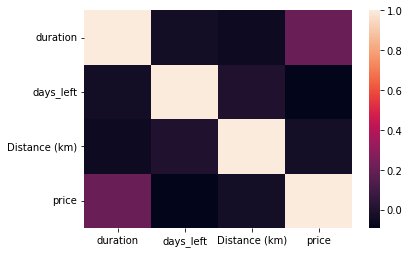

In [42]:
sns.heatmap(df.corr())

### Model Fitting



##### Linear Regression



In [59]:
lr = LinearRegression()

In [60]:
lr.fit(X_train, y_train)

LinearRegression()

In [61]:
lr.score(X_test, y_test)

0.9076584221540005

In [62]:
prediction = lr.predict(X_test)

In [63]:
np.mean(abs(y_test - prediction))

4626.5004532039675

In [64]:
y_test[1:5]

57761      5102
89314      5563
222793    45672
84235     12528
Name: price, dtype: int64

In [65]:
prediction[1:5]

array([ 6668.34175086,  7855.33995932, 57280.9384487 , 10653.02058781])

In [66]:
predictio = lr.predict(X_test)

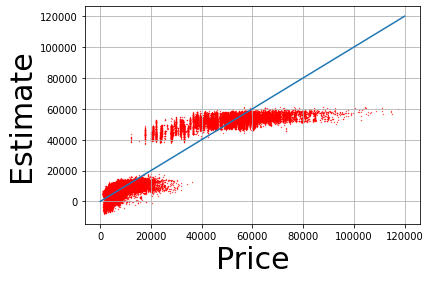

In [67]:
plt.scatter(y_test,predictio, s=0.1, c='red')
plt.xlabel('Price', fontsize = 30)
plt.ylabel('Estimate', fontsize = 30)
plt.grid('on')
plt.plot([0,120000], [0,120000])
plt.show()

### Support Vector Machines

Support vector regression


In [68]:
from sklearn.svm import SVR

In [69]:
#todo Riley and Nathan! sent some tips in zoom chat :)
svm = SVR(kernel='rbf')

In [70]:
svm.fit(X_train, y_train)

KeyboardInterrupt: 

In [0]:
svm.score(X_test, y_test)

In [0]:
prediction = svm.predict(X_test)
np.mean(abs(y_test - prediction))

In [0]:
y_test[:11]

In [0]:
prediction[:11]

##### Random Forest



In [12]:
rf = RandomForestRegressor(n_estimators=200, criterion='absolute_error', ccp_alpha=0.5)

In [13]:
distance_train = X_train['Distance (km)'].to_numpy()
distance_test = X_test['Distance (km)'].to_numpy()
distance_train = distance_train.reshape(-1, 1)
distance_test = distance_test.reshape(-1, 1)

In [13]:
rf.fit(X_train, y_train)

RandomForestRegressor(ccp_alpha=0.5, criterion='absolute_error',
                      n_estimators=200)

In [43]:
rf.score(X_test, y_test)

0.9780270990845933

In [19]:
drf = RandomForestRegressor()

In [20]:
drf.fit(distance_train, y_train)

RandomForestRegressor()

In [44]:
predictio = rf.predict(X_test)

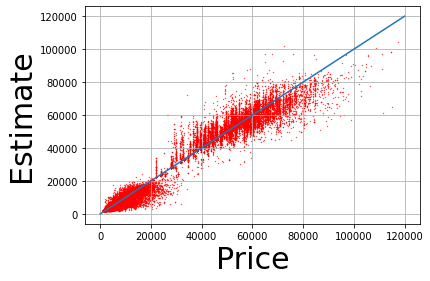

In [45]:
plt.scatter(y_test,predictio, s=0.1, c='red')
plt.xlabel('Price', fontsize = 30)
plt.ylabel('Estimate', fontsize = 30)
plt.grid('on')
plt.plot([0,120000], [0,120000])
plt.show()

In [46]:
np.mean(abs(y_test - predictio))

1691.6229291115917

#### Polynomial or ridge

- Define the model 
- Fit on train data \(X\_train , y\_train\)
- Score on Train data and test data



In [24]:
from sklearn.linear_model import Ridge


In [25]:
rdg = Ridge()

In [26]:
# n_samples, n_features = 10, 5
# rng = np.random.RandomState(0)
# y = rng.randn(n_samples)
# X = rng.randn(n_samples, n_features)
# clf = Ridge(alpha=1.0)
# clf.fit(X, y)
# Ridge()

In [27]:
rdg.fit(X_train , y_train) ## this is the part where model trains

Ridge()

In [28]:
rdg.score(X_train, y_train)

0.90693679669074

In [29]:
rdg.score(X_test, y_test)

0.9072034652577713

In [30]:
X_test.iloc[0:1,:]

,duration,days_left,Distance (km),airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,departure_time_Afternoon,...,stops_two_or_more,stops_zero,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,class_Business,class_Economy
88657,9.67,24,1740.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [31]:
rdg.predict(X_test.iloc[0:1,:])

array([8839.80539112])

In [32]:
## MLP classifier

### MLP Regressor



In [33]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

In [34]:
mc = MLPRegressor(hidden_layer_sizes=(100,),max_iter=200)
# recommend setting max_iter=300
#todo hidden_layer_sizes=(100,)

In [10]:
new = df.sample(frac=0.1, random_state=123)
y = new['price']
X = new.drop("price" , axis = 1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

In [37]:
#X, y = make_classification(n_samples=100, random_state=1)
#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
#...                                                     random_state=1)
#clf = MLPClassifier(hidden_layer_sizes=(100,), random_state=1, max_iter=300).fit(X_train, y_train)
#clf.predict_proba(X_test[:1])
#array([[0.038..., 0.961...]])
#clf.predict(X_test[:5, :])
#array([1, 0, 1, 0, 1])
#clf.score(X_test, y_test)
#0.8...

In [38]:
mc.fit(X_train, y_train)

/projects/7b851546-01cd-4477-a30c-927567abb7ed/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

In [39]:
mc.score(X_train, y_train)

0.8188654499825448

In [40]:
mc.score(X_test, y_test)

0.8195802715997837

In [41]:
prediction = mc.predict(X_test)

In [42]:
np.mean(abs(y_test - prediction))

7315.147429707546

In [43]:
y_test[1:5]

225871    22140
214826    57017
65144      5502
34319      6569
Name: price, dtype: int64

In [44]:
prediction[1:5]

array([30816.05291569, 47521.73412156, 11843.8881664 , 12606.63812034])